In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
kernel = '9x9'
video = 'videos/small_video.mp4'

# Sequential Timings

In [57]:
seq_timings = pd.read_csv(f'kernel_{kernel}_00/sequential.csv')
# video_path,microseconds
seq_timings = seq_timings[seq_timings['video_path'] == video]
microseconds = [float(x) for x in seq_timings['microseconds'].values[0].split('|')]
T_seq = sum(microseconds) / len(microseconds)
std = sum([(x - T_seq) ** 2 for x in microseconds]) / len(microseconds)
std = std ** 0.5
print(f'Sequential: {T_seq} +- {std}')

Sequential: 4669749.333333333 +- 31605.47307385577


# Ideal Speedup

In [58]:
m = 901

# 3x3 small video
# T_setup = 42545
# Read = 553.72
# Grayscale = 287.73
# Blur = 142
# Check = 347.72

# 9x9 small video
T_setup = 42545
Read = 553.72
Grayscale = 287.73
Blur = 4496.33
Check = 381.39


# # 3x3 large video
# T_setup = 202078
# Read = 4736.65
# Grayscale = 2742.64
# Blur = 1821.34
# Check = 3859.98

# 9x9 large video
# T_setup = 202078
# Read = 4736.65
# Grayscale = 2742.64
# Blur = 39213
# Check = 2424.91

T_s = lambda n_w: max(Read, (Grayscale + Blur + Check) / n_w)

ideal_speedup = lambda n_w: T_seq / (T_setup + Grayscale + Blur + (T_s(n_w) * (m-1)))
ideal_efficiency = lambda n_w: ideal_speedup(n_w) / n_w

# Thread (No PIN)

In [59]:
# <pin_threads> <blocking_mode>
thread_no_pin = pd.read_csv(f'kernel_{kernel}_00/thread.csv')
thread_no_pin = thread_no_pin[thread_no_pin['video_path'] == video]
T_thread_no_pin = {} # <num_threads> -> <time>
std_thread_no_pin = {} # <num_threads> -> <std>
threads = thread_no_pin['threads'].tolist()
for thread in threads:
    timings = thread_no_pin[thread_no_pin['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_thread_no_pin[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_thread_no_pin[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_thread_no_pin[thread] = std

# Thread PIN

In [60]:
# <pin_threads> <blocking_mode>
thread_pin = pd.read_csv(f'kernel_{kernel}_10/thread.csv')
thread_pin = thread_pin[thread_pin['video_path'] == video]
T_thread_pin = {} # <num_threads> -> <time>
std_thread_pin = {} # <num_threads> -> <std>
threads = thread_pin['threads'].tolist()
for thread in threads:
    timings = thread_pin[thread_pin['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_thread_pin[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_thread_pin[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_thread_pin[thread] = std

# FastFlow (NO pin, NO blocking)

In [61]:
# <pin_threads> <blocking_mode>
ff_no_pin_no_block = pd.read_csv(f'kernel_{kernel}_00/fastflow.csv')
ff_no_pin_no_block = ff_no_pin_no_block[ff_no_pin_no_block['video_path'] == video]
T_ff_no_pin_no_block = {} # <num_threads> -> <time>
std_ff_no_pin_no_block = {} # <num_threads> -> <std>
threads = ff_no_pin_no_block['threads'].tolist()
for thread in threads:
    timings = ff_no_pin_no_block[ff_no_pin_no_block['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_ff_no_pin_no_block[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_ff_no_pin_no_block[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_ff_no_pin_no_block[thread] = std

# FastFlow (PIN, NO blocking)

In [62]:
# <pin_threads> <blocking_mode>
ff_pin_no_block = pd.read_csv(f'kernel_{kernel}_10/fastflow.csv')
ff_pin_no_block = ff_pin_no_block[ff_pin_no_block['video_path'] == video]
T_ff_pin_no_block = {} # <num_threads> -> <time>
std_ff_pin_no_block = {} # <num_threads> -> <std>
threads = ff_pin_no_block['threads'].tolist()
for thread in threads:
    timings = ff_pin_no_block[ff_pin_no_block['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_ff_pin_no_block[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_ff_pin_no_block[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_ff_pin_no_block[thread] = std

# FastFlow (NO pin, BLOCKING)

In [63]:
# <pin_threads> <blocking_mode>
ff_no_pin_block = pd.read_csv(f'kernel_{kernel}_10/fastflow.csv')
ff_no_pin_block = ff_no_pin_block[ff_no_pin_block['video_path'] == video]
T_ff_no_pin_block = {} # <num_threads> -> <time>
std_ff_no_pin_block = {} # <num_threads> -> <std>
threads = ff_no_pin_block['threads'].tolist()
for thread in threads:
    timings = ff_no_pin_block[ff_no_pin_block['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_ff_no_pin_block[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_ff_no_pin_block[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_ff_no_pin_block[thread] = std

# FastFlow (PIN, BLOCKING)

In [64]:
# <pin_threads> <blocking_mode>
ff_pin_block = pd.read_csv(f'kernel_{kernel}_11/fastflow.csv')
ff_pin_block = ff_pin_block[ff_pin_block['video_path'] == video]
T_ff_pin_block = {} # <num_threads> -> <time>
std_ff_pin_block = {} # <num_threads> -> <std>
threads = ff_pin_block['threads'].tolist()
for thread in threads:
    timings = ff_pin_block[ff_pin_block['threads'] == thread]
    microseconds = [float(x) for x in timings['microseconds'].values[0].split('|')]
    T_ff_pin_block[thread] = sum(microseconds) / len(microseconds)
    std = sum([(x - T_ff_pin_block[thread]) ** 2 for x in microseconds]) / len(microseconds)
    std = std ** 0.5
    std_ff_pin_block[thread] = std

# Plotting

## Speedup

In [65]:
speedup = lambda T_par_n_w: T_seq / T_par_n_w

[]

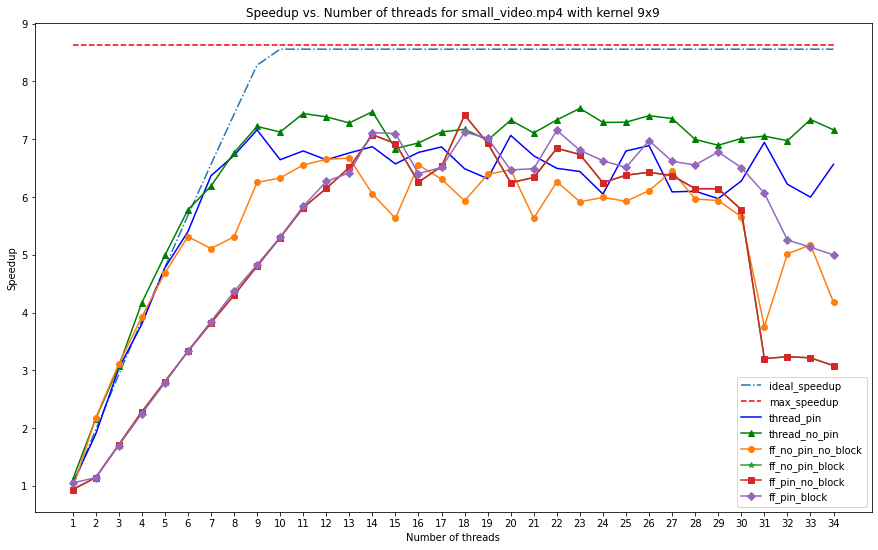

In [66]:
plt.figure(figsize=(15, 9))
# plot the ideal_speedup
plt.plot(threads, [ideal_speedup(x) for x in threads], '-.', label='ideal_speedup')
# Thread
serial_time = T_setup + Read * (m-1)
serial_fraction = serial_time / T_seq
max_speedup = 1 / serial_fraction
plt.plot(threads, [max_speedup for x in threads], 'r--', label='max_speedup')

# Thread no pin
plt.plot(threads, [speedup(x) for x in T_thread_pin.values()], 'b', label='thread_pin')
#plt.errorbar(threads, [speedup(x) for x in T_thread_pin.values()], yerr=[speedup(x + std_thread_pin[i]) - speedup(x) for i, x in T_thread_pin.items()], fmt='b', label='thread_pin')

# Thread pin
plt.plot(threads, [speedup(x) for x in T_thread_no_pin.values()], '-^', label='thread_no_pin', color='green')

# FastFlow no pin no block
plt.plot(threads, [speedup(x) for x in T_ff_no_pin_no_block.values()], '-o', label='ff_no_pin_no_block')
# FastFlow no pin block
plt.plot(threads, [speedup(x) for x in T_ff_no_pin_block.values()], '-*', label='ff_no_pin_block')
# FastFlow pin no block
plt.plot(threads, [speedup(x) for x in T_ff_pin_no_block.values()], '-s', label='ff_pin_no_block')
# FastFlow pin block
plt.plot(threads, [speedup(x) for x in T_ff_pin_block.values()], '-D', label='ff_pin_block')

plt.legend()
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.title(f'Speedup vs. Number of threads for {video.split("/")[-1]} with kernel {kernel}')
plt.xticks(threads)
plt.savefig(f'plots/speedup_{video.split("/")[-1]}_kernel_{kernel}.png')
plt.plot()

## Efficiency

In [67]:
efficiency = lambda T_par_n_w, n_w: speedup(T_par_n_w) / n_w

[]

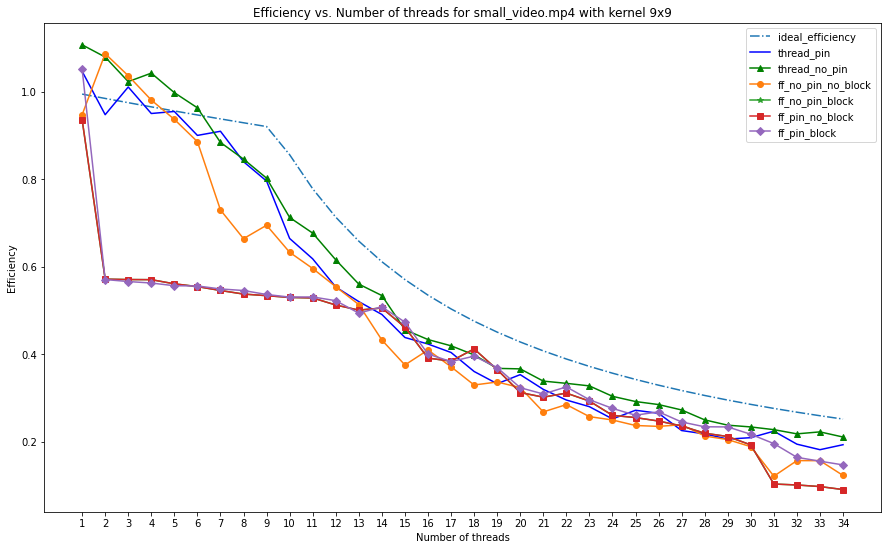

In [68]:
plt.figure(figsize=(15, 9))
# plot the ideal_efficiency
plt.plot(threads, [ideal_efficiency(x) for x in threads], '-.', label='ideal_efficiency')

# Thread
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_thread_pin.items()], 'b', label='thread_pin')

# Thread no pin
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_thread_no_pin.items()], '-^', label='thread_no_pin', color='green')

# FastFlow no pin no block
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_ff_no_pin_no_block.items()], '-o', label='ff_no_pin_no_block')
# FastFlow no pin block
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_ff_no_pin_block.items()], '-*', label='ff_no_pin_block')
# FastFlow pin no block
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_ff_pin_no_block.items()], '-s', label='ff_pin_no_block')
# FastFlow pin block
plt.plot(threads, [efficiency(x, n_w) for n_w, x in T_ff_pin_block.items()], '-D', label='ff_pin_block')

plt.legend()
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')
plt.title(f'Efficiency vs. Number of threads for {video.split("/")[-1]} with kernel {kernel}')
plt.xticks(threads)
plt.savefig(f'plots/efficiency_{video.split("/")[-1]}_kernel_{kernel}.png')
plt.plot()